In [1]:
from skimage import data
from scipy.ndimage import morphology
import numpy as np
from matplotlib import pyplot as plt
import skimage
%matplotlib inline

## Построение морфологического скелета

Возьмем в качестве тестового изображения лошадку.

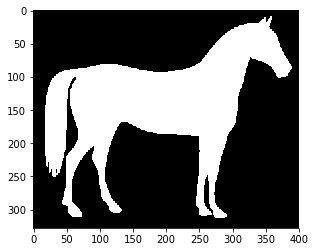

In [2]:
horse = np.logical_not(data.horse())
plt.imshow(horse, cmap='gray')

В качестве структурируещего элемента возьмем вот такой круг радиуса $3$ ($B(3)$).

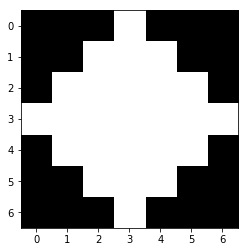

In [3]:
structure = morphology.generate_binary_structure(2, 1)
final_structure = np.zeros((7, 7), dtype=bool)
final_structure[2:5,2:5] = structure
for i in range(2):
    final_structure = morphology.binary_dilation(final_structure, structure)
plt.imshow(final_structure, cmap='gray')

Реализуем алгоритм построения скелета и выведем его для заданных изображения и структурного элемента.

In [4]:
from functools import reduce

def skeletonize(image, struct_element):
    skeleton_sets = []
    y1 = image
    while True:
        y2 = morphology.binary_erosion(y1, struct_element)
        if not y2.any():
            skeleton_sets.append(y1)
            break
        y3 = morphology.binary_dilation(y2, struct_element)
        skeleton_sets.append(np.logical_and(y1, np.logical_not(y3)))
        y1 = y2
    return reduce(np.logical_or, skeleton_sets), skeleton_sets

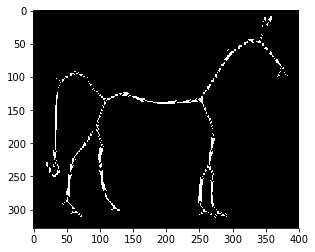

In [5]:
skeleton, skeleton_sets = skeletonize(horse, final_structure)
plt.imshow(skeleton, cmap='gray')

Восстановим и проверим совпадут ли изображения (исходное и восстановленное).

In [6]:
def restore(skeleton_sets, structure):
    n = len(skeleton_sets)
    a = np.zeros(skeleton_sets[0].shape, dtype=bool)
    for i, skeleton_set in enumerate(reversed(skeleton_sets)):
        a = np.logical_or(a, skeleton_set)
        if i == n - 1:
            break
        a = morphology.binary_dilation(a, structure)
    return a

Q: Are images equal?
A: True


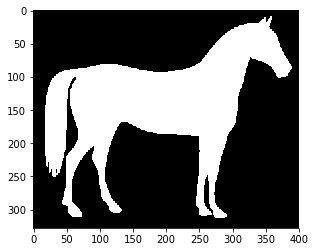

In [7]:
restored_horse = restore(skeleton_sets, final_structure)
plt.imshow(restored_horse, cmap='gray')
print('Q: Are images equal?\nA: {}'.format((restored_horse == horse).all()))